In [1]:
from data import train_df, test_df
import numpy as np
import pandas as pd

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train_df.describe()

/Users/bonifacio/.pyenv/versions/3.4.4/envs/ml-kit/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

*Remover entradas que possuem NaN reduz bastante o tamanho do dataset*

In [4]:
train_df.dropna().describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200

## Análise inicial

In [5]:
# pra ver quantas pessoas sobreviveram
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# pra ver os percentuais de quem sobreviveu
train_df["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
# quantos homens sobreviveram
train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [8]:
# quantas mulheres sobreviveram
train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

Proporcionalmente, um número maior de mulheres sobreviveram. Seria por causa da política de "mulheres e crianças primeiro"?

In [9]:
# Existe o campo "Child"?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# Completando os valores em branco para a mediana da feature "Age".
# Usamos mediana ao invés de média por ela ser menos sensível a outliers (i.e., a mediana é uma estatística robusta).
train_df['Age'] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Child"] = 0
children = train_df["Age"] < 18
train_df.loc[children, "Child"] = 1
train_df["Survived"][train_df["Child"] == 0].value_counts(normalize=True)

0    0.638817
1    0.361183
Name: Survived, dtype: float64

In [11]:
# A feature 'Sex' precisa ser mapeada para inteiros
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [12]:
# Vamos usar então as features 'Sex' e 'Child' para uma classificacao inicial
from sklearn import tree

# Separando o resultado e as features usadas
target = train_df['Survived'].values
initial_features = train_df[['Sex', 'Child']].values

# Da classifier
my_tree_one = tree.DecisionTreeClassifier().fit(initial_features, target)

# Look at the importance of the included features and print the score
print(my_tree_one.feature_importances_)
print(my_tree_one.score(initial_features, target))

[ 0.95466315  0.04533685]
0.786756453423


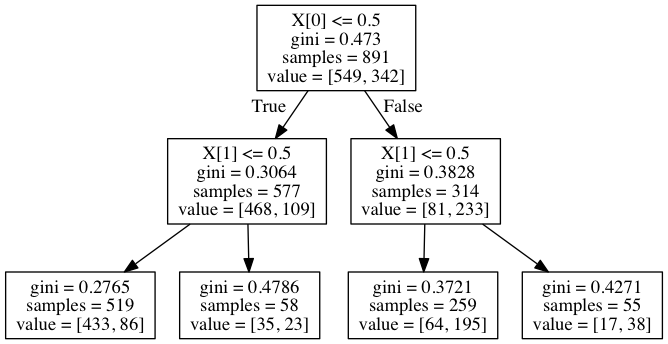

In [13]:
import pydotplus as pydot
from sklearn.externals.six import StringIO
from IPython.display import Image 
dotfile = StringIO()
tree.export_graphviz(my_tree_one, out_file=dotfile)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

A árvore de decisão funciona aplicando as decisões de cada nível ao exemplo passado como entrada. Ao se chegar a uma folha, a árvore checa o que aconteceu com a maioria dos exemplos que possuem aquelas características: se a maioria tiver sobrevivido, a árvore decide que o novo exemplo também deve ter sobrevivido. TODO: observações sobre o efeito de permutação de features na árvore resultante.

In [36]:
# Vamos definir algumas constantes para ajudar com a legibilidade dos dados.
DIED = 0
SURVIVED = 1

MALE = 0
FEMALE = 1    

In [37]:
# Por exemplo, existem 55 crianças do sexo feminino no conjunto de treinamento. A maioria delas sobreviveram,
# o que pode ser visto na filtragem abaixo...
female_children =  train_df[(train_df['Child'] == 1) & (train_df['Sex'] == FEMALE)]
female_children.groupby('Survived').describe()

Age  Child        Fare      Parch  PassengerId  \
Survived                                                               
0        count  17.000000   17.0   17.000000  17.000000    17.000000   
         mean    8.441176    1.0   31.911765   1.411765   349.176471   
         std     5.061751    0.0   32.402672   0.795206   278.293064   
         min     2.000000    1.0    7.854200   0.000000    15.000000   
         25%     3.000000    1.0   15.245800   1.000000   115.000000   
         50%     9.000000    1.0   27.900000   2.000000   298.000000   
         75%    11.000000    1.0   31.275000   2.000000   543.000000   
         max    17.000000    1.0  151.550000   2.000000   853.000000   
1        count  38.000000   38.0   38.000000  38.000000    38.000000   
         mean    9.592105    1.0   33.172261   0.868421   416.342105   
         std     6.159595    0.0   39.725627   0.777072   279.844482   
         min     0.750000    1.0    7.225000   0.000000    10.000000   
         25%     4.000000    1.0   12.071875   0.000000   176.000000   
         50%    10.500000    1.0   19.379150   1.000000   441.500000   
         75%    15.750000    1.0   32.596875   1.000000   678.750000   
         max    17.000000    1.0  211.337500   2.000000   876.000000   

                   Pclass   Sex      SibSp  
Survived                                    
0        count  17.000000  17.0  17.000000  
         mean    2.882353   1.0   2.235294  
         std     0.485071   0.0   1.714986  
         min     1.000000   1.0   0.000000  
         25%     3.000000   1.0   1.000000  
         50%     3.000000   1.0   3.000000  
         75%     3.000000   1.0   4.000000  
         max     3.000000   1.0   5.000000  
1        count  38.000000  38.0  38.000000  
         mean    2.315789   1.0   0.736842  
         std     0.774780   0.0   1.031509  
         min     1.000000   1.0   0.000000  
         25%     2.000000   1.0   0.000000  
         50%     2.500000   1.0   0.000000  
         75%     3.000000   1.0   1.000000  
         max     3.000000   1.0   4.000000

In [16]:
# ...Logo, ao se passar para a árvore um exemplo consistindo de uma
# criança do sexo feminino, a árvore decidirá que ela deve ter sobrevivido.
new_female_child = pd.DataFrame(data=[[FEMALE, 1]], columns=['Gender', 'Child'])
prediction = my_tree_one.predict(new_female_child)

if (prediction[0] == SURVIVED):
    print('Survived :D')
else:
    print('Died :(')

Survived :D


In [44]:
def encode_gender(dataframe):
    encoded_dataframe = dataframe.copy()
    encoded_dataframe['Sex'] = encoded_dataframe['Sex'].map({'male': MALE, 'female': FEMALE})
    return encoded_dataframe

def encode_gender_and_child(input_dataframe):
    encoded_dataframe = input_dataframe.copy()
    
    encoded_dataframe = encode_gender(encoded_dataframe)
    
    encoded_dataframe['Age'] = encoded_dataframe["Age"].fillna(encoded_dataframe["Age"].median())
    encoded_dataframe["Child"] = 0
    children = encoded_dataframe["Age"] < 18
    encoded_dataframe.loc[children, "Child"] = 1
    
    return encoded_dataframe

def extract_features_from_dataframe(dataframe, feature_names):
    return dataframe.ix[:, feature_names]
    

In [72]:
test_features_df = extract_features_from_dataframe(test_df, ['Sex', 'Age'])

encoded_test_df = encode_gender_and_child(test_features_df).drop('Age', 1)

test_features = encoded_test_df[['Sex', 'Child']].values

test_targets = my_tree_one.predict(test_features)
test_df['Survived'] = test_targets

In [60]:
encoded_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
Sex      418 non-null int64
Child    418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [46]:
test_df.to_csv('./data/test_data_with_results.csv')

first_attempt = test_df.ix[:, ['PassengerId', 'Survived']]
first_attempt.to_csv('./data/first_attempt.csv', index=False)

#### Com esse conjunto de dados a gente já consegue prever sobrevivência com uma precisão de 0.76555 no conjunto de dados usado para avaliar as submissões do Kaggle.

## Inclusão das features "Cabin" e "Fare"

In [47]:
cabin_fare_df = train_df.ix[:, ['Cabin', 'Fare']]
cabin_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Cabin    204 non-null object
Fare     891 non-null float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [48]:
len(cabin_fare_df['Cabin'].unique())

148

A feature "Cabin" é categórica com um range relativamente grande(148 valores diferentes) e várias entradas vazias. Não é adequado codificar essa feature como uma sequência numérica pois isso implicaria uma ordenação dos valores, o que não condiz com a semântica dessa feature e poderia levar a resultados incoerentes. Essa feature será ignorada nesse momento e analisada por último como uma possível inclusão de informação para melhora do resultado final.

In [49]:
def get_tree_for_features(features):
    target = train_df['Survived'].values
    feature_values = train_df[features].values

    # Da classifier
    return (tree.DecisionTreeClassifier().fit(feature_values, target), feature_values, target)


In [50]:
features = ['Sex', 'Child', 'Fare']
third_tree, feature_values, target = get_tree_for_features(features)

In [51]:
third_tree.score(feature_values, target)

0.9135802469135802

In [73]:
encoded_test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
encoded_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
Sex      418 non-null int64
Child    418 non-null int64
Fare     418 non-null float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [74]:
test_features = encoded_test_df.values
predictions = third_tree.predict(test_features)
encoded_test_df['Survived'] = predictions

In [75]:
encoded_test_df['PassengerId'] = test_df['PassengerId']

second_attempt = encoded_test_df.ix[:, ['PassengerId', 'Survived']]
second_attempt.info()
second_attempt.to_csv('./data/second_attempt.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


A inclusão da feature 'Fare' fez com que a classificação da submissão melhorasse em cerca de 1% (para 0.77990) - no ranking geral, no entanto, isso foi suficiente para subir 1104 posições lol